# Pandas
Na dnešním workshopu se budeme věnovat pythonímu balíčku Pandas. Cílem tohoto balíčku je poskytnutí takových datových struktur, které dovolí rychlou a snadnou práci s tabulkoidními daty, které najdeme v excelovských worksheetech anebo ve výsledcích SQL dotazů.
Na minulém workshopu jsme pracovali s konzolí a s Notepadem++, se kterým jsme editovaly py soubor. Pro dnešek bude náš hlavní pracoví nástroj Jupyter notebook. Jelikož se s tím někteří z Vás ještě nemuseli setkat, bude na workshopu *velice* krátké seznámení s ním.
### Obsah
[Řuční vytváření a základní operace](#Ruční-vytváření-a-základní-operace)  
[Manipulace se sloupci dataframu](#Manipulace-se-sloupci-dataframu)  
[Manipulace s řádky dataframu](#Manipulace-s-řádky-dataframu)  
[SQL dotazy v Pandas](#SQL-dotazy-v-Pandas)  
[Čtení a zápis](#Čtení-a-zápis)  
[Vizualizace](#Vizualizace) 

### Ruční vytváření a základní operace
Ruční vytváření pandích tabulek - DataFramů - asi není ta nejčastější operace, kterou člověk s balíčkem Pandas provádí. Nicméně svoje místo to má, zejména při psaní testů.
Nejprve je třeba pandí balíček importovat. Zažila se zvyklost, že se na import vypustí alias pd, aby nebyl kód zbytečně nafukován přeci jen delším názvem balíčku. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Balíček Pandas obsahuje dva základní datové typy - Series ala 1D strukturu (představte si pod tím třeba sloupec tabulky) a DataFrame ala 2D strukturu složenou právě z objektů typu Series. Jelikož čas tohoto workshopu je omezen, budeme se primárně věnovat druhému jmenovanému. 
Vytvoření prázdného dataframu není zrovna náročné:

In [12]:
prazdny_dataframe = pd.DataFrame()
prazdny_dataframe

Empty DataFrame
Columns: []
Index: []

Pakliže chceme vytvořit dataframe již naplněný daty, musíme do konstrukturu vložit slovník, kde klíči jsou stringy - názvy sloupců a hodnotami jsou listy obsahující hodnoty v daném sloupci. Jednotlivé sloupce mohou mít různé datové typy. Musí mít ale stejnou délku, jinak Vás čeká setkání s ValueError.

In [13]:
jenom_integery = [1,2,3,4,155]
jenom_stringy = ["jedna", "dva", "tři", "čtyři", "pět"]
vsechno_mozne = [1,2, "hodně", "málo", 1.23]
naplneny_dataframe = pd.DataFrame({"cela cisla": jenom_integery, "stringy": jenom_stringy, "smes": vsechno_mozne})
naplneny_dataframe

cela cisla stringy   smes
0           1   jedna      1
1           2     dva      2
2           3     tři  hodně
3           4   čtyři   málo
4         155     pět   1.23

Co s takovýmto DataFramem můžeme dělat? Lze na něj kupříkladu vypustit funkce, které nám o něm poskytnou obecné informace. 
Funkce info nám řekne, kolik má dataframe řádků (5) a jaké mají řádky indexy (0 až 4). Dále nám sdělí, jaký je datový typ příslušného sloupce. Pokud jsou v celém sloupci integery, spatříme int64, pokud máme datové typy smíchané, bude typem sloupce object. To samé uvidíme i u sloupce plného stringů. Pokud u sloupce, který měl obsahovat čísla, uvidíte object, značí to problém. Typická je záměna desetinné tečky za desetinnou čárku. Podobná věc často nastává i u fakticky datumových sloupců, které ale nebyly na datumový typ převedeny.

In [14]:
naplneny_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   cela cisla  5 non-null      int64 
 1   stringy     5 non-null      object
 2   smes        5 non-null      object
dtypes: int64(1), object(2)
memory usage: 248.0+ bytes


Funkce info nám sice řekne, jak je dataframe velký, tuto informaci ale obklopuje hromada textu. Neexistovala by jiná cesta, jak tento údaj získat bez zbytečného balastu okolo?
První možností je shape. Zde by se slušelo zdůraznit, že v tomto případě se nejedná o funkci, ale o parametr objektu. Ten má konkrétně formu tuplu o dvou prvcích, z nichž první představuje počet řádků a druhý počet sloupců.

In [15]:
naplneny_dataframe.shape

(5, 3)

Samozřejmě je pro pandí dataframe definovaná i funkce len. Ta vrací jedno číslo - počet řádků.

In [16]:
len(naplneny_dataframe)

5

Druhou dataframy obecně popisující funkcí je describe. Ta pro číselné sloupce ukazuje věci typu maximum, medián  či průměr. Pro smíšené sloupce či sloupce se stringy nám funkce poskytne informace o počtu hondot, o počtu unikátních hodnot a ukáže nám též nejčastější se vyskytující prvek i s počtem jeho výskytů.
Bacha - pokud tuto funkci u dataframu s různými typy sloupců zavoláme bez parametru, objeví se před námi shrnutí pouze jednoho typu sloupců. Pokud chceme vidět vše najednou, musíme použít parametr include, kterému je přiřazena hodnota "all".

In [17]:
naplneny_dataframe.describe(include="all")

cela cisla stringy  smes
count     5.000000       5     5
unique         NaN       5     5
top            NaN     pět  málo
freq           NaN       1     1
mean     33.000000     NaN   NaN
std      68.209237     NaN   NaN
min       1.000000     NaN   NaN
25%       2.000000     NaN   NaN
50%       3.000000     NaN   NaN
75%       4.000000     NaN   NaN
max     155.000000     NaN   NaN

### Manipulace se sloupci dataframu
Pokud chceme vybrat jeden sloupec dataframu, vložíme jeho název do hranatých uvozovek, které následují po jménu dotčeného dataframu. Bacha - takto získame 1D Series objekt, nikoli 2D objekt DataFrame.

In [18]:
naplneny_dataframe["cela cisla"]

0      1
1      2
2      3
3      4
4    155
Name: cela cisla, dtype: int64

Alternativně lze psát (pakliže v názvu sloupce není mezera)

In [19]:
naplneny_dataframe.stringy

0    jedna
1      dva
2      tři
3    čtyři
4      pět
Name: stringy, dtype: object

Člověk by si mohl myslet, že pro zobrazení více sloupců stačí psát jména těchto sloupců za sebe oddělené čárkami. Takto jednoduché to ale není:

In [20]:
naplneny_dataframe["cela cisla", "stringy"]

KeyError: ('cela cisla', 'stringy')

V případě, kdy počet vybíraných sloupců přesáhne jedna, je nutné se dataframu předávat jako list, tj. seznam jmen musí být obklopen dvojicí hranatých závorek. To má mimo jiné za následek, že je vracen DataFrame a ne Series.

In [21]:
naplneny_dataframe[["cela cisla", "stringy"]]

cela cisla stringy
0           1   jedna
1           2     dva
2           3     tři
3           4   čtyři
4         155     pět

Pakliže chceme přidat sloupec:

In [22]:
naplneny_dataframe["jednicky"] = 1
naplneny_dataframe["spojeni_sloupcu"] = naplneny_dataframe["stringy"] + " " + naplneny_dataframe["stringy"]
naplneny_dataframe

cela cisla stringy   smes  jednicky spojeni_sloupcu
0           1   jedna      1         1     jedna jedna
1           2     dva      2         1         dva dva
2           3     tři  hodně         1         tři tři
3           4   čtyři   málo         1     čtyři čtyři
4         155     pět   1.23         1         pět pět

Pro smazání sloupců se použije funkce *drop*. Jelikož ta dokáže smazat i řádky, musí se jí kromě názvu sloupce předat parametr axis. Ten má pro mazání sloupců hodnotu 1, pro mazání řádků hodnotu 0. Bacha - pakliže se do parametrů dropu nevloží inplace=True, tak se operace neprovede na původním dataframu. Namísto toho se vyrobí dataframe nový, který je funkcí drop vrácen.

In [23]:
naplneny_dataframe = naplneny_dataframe.drop(labels="jednicky", axis=1)
naplneny_dataframe

cela cisla stringy   smes spojeni_sloupcu
0           1   jedna      1     jedna jedna
1           2     dva      2         dva dva
2           3     tři  hodně         tři tři
3           4   čtyři   málo     čtyři čtyři
4         155     pět   1.23         pět pět

Pakliže chceme přidat sloupec na jiné než poslední místo, použije se funkce *insert*. Ta přebírá tři parametry. Prvním je index vkládaného sloupce (pokud má být sloupec první, musí být index roven nule). Druhým parametrem je jméno sloupce, třetím jsou pak hodnoty, které sloupec obsahuje. Je potřeba poznamenat, že narozdíl od dropu *insert* funguje **pouze** v modu úpravy stávajícího objektu.

In [24]:
naplneny_dataframe.insert(3, "stringy_podruhe", naplneny_dataframe["stringy"])
naplneny_dataframe

cela cisla stringy   smes stringy_podruhe spojeni_sloupcu
0           1   jedna      1           jedna     jedna jedna
1           2     dva      2             dva         dva dva
2           3     tři  hodně             tři         tři tři
3           4   čtyři   málo           čtyři     čtyři čtyři
4         155     pět   1.23             pět         pět pět

Pokud už jsme ale sloupec na konec dataframu vložili a nyní sloupce potřebujeme přeuspořádat, lze použít například funkci reindex:

In [25]:
naplneny_dataframe = naplneny_dataframe.reindex(columns=["cela cisla","stringy", "stringy_podruhe", "spojeni_sloupcu", "smes"])
naplneny_dataframe

cela cisla stringy stringy_podruhe spojeni_sloupcu   smes
0           1   jedna           jedna     jedna jedna      1
1           2     dva             dva         dva dva      2
2           3     tři             tři         tři tři  hodně
3           4   čtyři           čtyři     čtyři čtyři   málo
4         155     pět             pět         pět pět   1.23

Anebo obyčejný výběr všech sloupců:

In [26]:
naplneny_dataframe = naplneny_dataframe[["stringy", "stringy_podruhe", "spojeni_sloupcu", "cela cisla", "smes"]]
naplneny_dataframe

stringy stringy_podruhe spojeni_sloupcu  cela cisla   smes
0   jedna           jedna     jedna jedna           1      1
1     dva             dva         dva dva           2      2
2     tři             tři         tři tři           3  hodně
3   čtyři           čtyři     čtyři čtyři           4   málo
4     pět             pět         pět pět         155   1.23

Pokud sloupce nechceme přeuspořádat, ale pouze přejmenovat, postačí použití parametru column. 

In [27]:
naplneny_dataframe.columns

Index(['stringy', 'stringy_podruhe', 'spojeni_sloupcu', 'cela cisla', 'smes'], dtype='object')

Tomu se podhodí list s novými jmény:

In [28]:
naplneny_dataframe.columns = ['stringy', 'stringy_znova', 'spojeni_sloipcu', "cela cisla", "smes"]

U dataframů s nadkritickým počtem sloupců se nezobrazují sloupce všechny, ale jen ty na kraji. Podobná věc platí i u řádků. Pokud toto chování chceme vypnout, napíšeme
```python
pd.set_option("display.max_columns", None)
```
resp.
```python
pd.set_option("display.max_rows", None)
```
Takovéto vypnutí bude ale platit globálně pro celý kód, tj. pro celý jupyteří notebook. Pokud chceme vypnutí mít platné jen pro jeden dataframe, použijeme **with** v kombinaci s funkcí **display**:
```python
with pd.option_context("display.max_columns", None): 
    display(naplneny_dataframe)
```

### Manipulace s řádky dataframu

Řádky v dataframu jsou určeny svými indexy (= to číslo v "nultém" sloupci dataframu). Když chceme získat dejme tomu druhý řádek, aplikuje funkci iloc následujícím způsobem:

In [29]:
naplneny_dataframe.iloc[1]

stringy                dva
stringy_znova          dva
spojeni_sloipcu    dva dva
cela cisla               2
smes                     2
Name: 1, dtype: object

Nicméně podobně by se dala použít i funkce loc:

In [30]:
naplneny_dataframe.loc[1]

stringy                dva
stringy_znova          dva
spojeni_sloipcu    dva dva
cela cisla               2
smes                     2
Name: 1, dtype: object

Jaký je mezi nimi vlastně rozdíl? Metoda *iloc* vždy hledí na index řádku (de facto pořadové číslo), zatímco *loc* kouká na label řádku. Defaultně jsou labely stejné jako indexy a obě funkce tedy vrací to samé. Změňme nyní ale labely indexů:

In [31]:
#aktualni indexy
print(naplneny_dataframe.index)
#prejmenovani
naplneny_dataframe.index = ["prvni", "druhy", "treti", "ctvrty", "paty"]
#zkontrolovani, ze jsou indexy jine
print(naplneny_dataframe.index)
#A zkontrolovani, ze dataframe vypada tak, jak bychom ocekavali
naplneny_dataframe

RangeIndex(start=0, stop=5, step=1)
Index(['prvni', 'druhy', 'treti', 'ctvrty', 'paty'], dtype='object')


stringy stringy_znova spojeni_sloipcu  cela cisla   smes
prvni    jedna         jedna     jedna jedna           1      1
druhy      dva           dva         dva dva           2      2
treti      tři           tři         tři tři           3  hodně
ctvrty   čtyři         čtyři     čtyři čtyři           4   málo
paty       pět           pět         pět pět         155   1.23

Nyní použití *iloc* a *loc* zopakujeme. Funkce *iloc* vrací pořád to samé:

In [22]:
naplneny_dataframe.iloc[1]

stringy                dva
stringy_znova          dva
spojeni_sloipcu    dva dva
cela cisla               2
smes                     2
Name: druhy, dtype: object

Použití funkce *loc* mající v hranatých závorkách 1 ale vede k chybě:

In [32]:
naplneny_dataframe.loc[1]

KeyError: 1

Jakmile je ale v hranatých závorkách label indexu, už zase *loc* funguje.

In [33]:
naplneny_dataframe.loc["druhy"]

stringy                dva
stringy_znova          dva
spojeni_sloipcu    dva dva
cela cisla               2
smes                     2
Name: druhy, dtype: object

Řádky smažeme podobně jako sloupce pomocí metody *drop* - jako axis je tentokrát nula:

In [25]:
naplneny_dataframe = naplneny_dataframe.drop(["ctvrty", "paty"], axis=0)
naplneny_dataframe

stringy stringy_znova spojeni_sloipcu  cela cisla   smes
prvni   jedna         jedna     jedna jedna           1      1
druhy     dva           dva         dva dva           2      2
treti     tři           tři         tři tři           3  hodně

Na sloučení více dataframů (anebo na přidání řádky na konec dataframu) se používá metoda *concat*. Ta jako parametr bere list spojovaných dataframů (v případě přidávání řádky si člověk musí vytvoři minidataframe obsahující pouze ji).
Pandas mají metodu i *append*, která mi podle dokumentace přijde extrémně podobná *concatu*. Strýčet Google tuhle domněnku potvrzuje s tím, že concat je obvykle stejně rychlé, v jistých případech i rychlejší.

In [34]:
slozenina = pd.concat([naplneny_dataframe, naplneny_dataframe])
slozenina

stringy stringy_znova spojeni_sloipcu  cela cisla   smes
prvni    jedna         jedna     jedna jedna           1      1
druhy      dva           dva         dva dva           2      2
treti      tři           tři         tři tři           3  hodně
ctvrty   čtyři         čtyři     čtyři čtyři           4   málo
paty       pět           pět         pět pět         155   1.23
prvni    jedna         jedna     jedna jedna           1      1
druhy      dva           dva         dva dva           2      2
treti      tři           tři         tři tři           3  hodně
ctvrty   čtyři         čtyři     čtyři čtyři           4   málo
paty       pět           pět         pět pět         155   1.23

Vidíme, že nyní *loc* vrací dva řádky

In [35]:
slozenina.loc["druhy"]

stringy stringy_znova spojeni_sloipcu  cela cisla smes
druhy     dva           dva         dva dva           2    2
druhy     dva           dva         dva dva           2    2

Oproti tomu *iloc* vrací pořád jeden řádek.

In [36]:
naplneny_dataframe.iloc[1]

stringy                dva
stringy_znova          dva
spojeni_sloipcu    dva dva
cela cisla               2
smes                     2
Name: druhy, dtype: object

Z toho je patrné, že olabelované indexy mohou mít odlišné chování než čísla indexů. Nyní záleží na tom, co vlastně potřebujeme. Pokud by nás zdvojení indexů mátlo, resp. pokud by se nám nelíbilo, že indexy jednotlivých sešitých dataframů začínají vždy od nuly, zresetujeme index s pomocí funkce *reset_index*. Ta defaultně "zastaralé" indexy vloží do nového sloupce dataframu. Pokud by se nám to nelíbilo, musíme *reset_index* volat s parametrem *drop=True*.

In [37]:
slozenina = slozenina.reset_index()
slozenina

index stringy stringy_znova spojeni_sloipcu  cela cisla   smes
0   prvni   jedna         jedna     jedna jedna           1      1
1   druhy     dva           dva         dva dva           2      2
2   treti     tři           tři         tři tři           3  hodně
3  ctvrty   čtyři         čtyři     čtyři čtyři           4   málo
4    paty     pět           pět         pět pět         155   1.23
5   prvni   jedna         jedna     jedna jedna           1      1
6   druhy     dva           dva         dva dva           2      2
7   treti     tři           tři         tři tři           3  hodně
8  ctvrty   čtyři         čtyři     čtyři čtyři           4   málo
9    paty     pět           pět         pět pět         155   1.23

Pokud bychom chtěli aplikovat nějakou funkci na každý řádek dataframu, je klasické for iterování extrémně špatný a extrémně zdlouhavý postup. Správně by se měla použít funkce apply. To, co ukazuji na následujícím příkladu, by se elegantněji a snadněji vyřešilo pomocí
```python
slozenina[["cela cisla"]] + 50
```
Nicméně vhodnější ukázka mne nenapadla...

In [39]:
def get_plus_fifty(number:int)->int:
    """Returns iriginal number increased by factor 50.
    
    Args:
        number(int): Original number
    
    Returns:
        int: Original number increased by 50.
    """
    return number + 50

slozenina[["cela cisla"]].apply(lambda x:get_plus_fifty(x))

cela cisla
0          51
1          52
2          53
3          54
4         205
5          51
6          52
7          53
8          54
9         205

### SQL dotazy v Pandas
Viděli jsme, že Pandas lze využít na manipulaci s tabulkoidní daty. De facto podobnou věc provádíme i v relačních databázích. Existuje nějaký převod mezi SQL dotazy a operacemi s pandími dataframy? Před samotným zkoumáním této otázky si vytvořme dataframy, se kterými budeme v tomto odstavci pracovat.

In [3]:
osoby = pd.DataFrame({
    "id" : [100,200,300,400,500],
    "krestni_jmeno" : ["Victor", "Mary", "Johann", "Albert", "William"],
    "prijmeni" : ["Hugo", "Shelly", "Geothe", "Camus", "Shakespear"],
    "vek" : [25,30,75,None,38],
    "pohlavi" : ["M", "F", "M", "M", "M"]
})
osoby

id krestni_jmeno    prijmeni   vek pohlavi
0  100        Victor        Hugo  25.0       M
1  200          Mary      Shelly  30.0       F
2  300        Johann      Geothe  75.0       M
3  400        Albert       Camus   NaN       M
4  500       William  Shakespear  38.0       M

In [4]:
prodane_knihy = pd.DataFrame({
    "id" : [100,200,300,400],
    "pocet_knih" : [19,25,12,31]
})
prodane_knihy

id  pocet_knih
0  100          19
1  200          25
2  300          12
3  400          31

Nejprve se podívejme na klasický select
```sql
select krestni_jmeno, prijmeni, vek from osoby;
```
Ten s pomocí pand zrealizujeme jako

In [45]:
osoby[["krestni_jmeno", "prijmeni", "vek"]]

krestni_jmeno    prijmeni   vek
0        Victor        Hugo  25.0
1          Mary      Shelly  30.0
2        Johann      Geothe  75.0
3        Albert       Camus   NaN
4       William  Shakespear  38.0

Co kdybychom ale chtěli jen dvě řádky?
```sql
select top 2 krestni_jmeno, prijmeni, vek from osoby;
```

In [46]:
osoby[["krestni_jmeno", "prijmeni", "vek"]].head(2)

krestni_jmeno prijmeni   vek
0        Victor     Hugo  25.0
1          Mary   Shelly  30.0

Pro *WHERE* podmínku napíšeme 
```sql
select * from osoby where prijmeni = 'Geothe';
```

In [47]:
osoby[osoby["prijmeni"]=="Geothe"]

id krestni_jmeno prijmeni   vek pohlavi
2  300        Johann   Geothe  75.0       M

Co když ve *WHERE* bude více podmínek? Pro *and* mezi ně vložíme znak *&*, pro *or* znak *|*.
```sql
select * from osoby where prijmeni = 'Geothe' and krestni_jmeno = "Johann";
```

In [48]:
osoby[(osoby["prijmeni"]=="Geothe") & (osoby["krestni_jmeno"]=="Johann")]

id krestni_jmeno prijmeni   vek pohlavi
2  300        Johann   Geothe  75.0       M

A co když chceme jednak omezení na sloupce a jednak omezení na řádky?
```sql
select id from osoby where prijmeni = 'Geothe' and krestni_jmeno = "Johann";
```

In [49]:
osoby[["id"]][(osoby["prijmeni"]=="Geothe") & (osoby["krestni_jmeno"]=="Johann")]

id
2  300

Jak bychom ale v pandách ošetřili přítomnost NULLu (v Pythonu None)?
```sql
select * osoby where vek is NULL;
```

In [50]:
osoby[osoby["vek"].isna()]

id krestni_jmeno prijmeni  vek pohlavi
3  400        Albert    Camus  NaN       M

Variací na like je funkce str.contains.
```sql
select * osoby where prijmeni like '%eoth%';

```

In [51]:
osoby[osoby["prijmeni"].str.contains("eoth")]

id krestni_jmeno prijmeni   vek pohlavi
2  300        Johann   Geothe  75.0       M

Pro emulaci *not like* se musí na začátek prvních hranatých závorek umístit vlnovka, která vede k negaci následné podmínky.

In [52]:
osoby[~osoby["prijmeni"].str.contains("eoth")]

id krestni_jmeno    prijmeni   vek pohlavi
0  100        Victor        Hugo  25.0       M
1  200          Mary      Shelly  30.0       F
3  400        Albert       Camus   NaN       M
4  500       William  Shakespear  38.0       M

Občas je též potřeba data podle hodnoty nějakého sloupce setřídit
```sql
select * osoby order by vek desc;
```

In [53]:
osoby.sort_values(["vek"], ascending=False)

id krestni_jmeno    prijmeni   vek pohlavi
2  300        Johann      Geothe  75.0       M
4  500       William  Shakespear  38.0       M
1  200          Mary      Shelly  30.0       F
0  100        Victor        Hugo  25.0       M
3  400        Albert       Camus   NaN       M

Jak realizovat agregace a count? Použijeme funkci size - oproti pythonímu countu nepovede k nadbytečnému opakování týchž hodnot pro každý sloupec.
```sql
select pohlavi, count(*) from osoby group by pohlavi;
```

In [54]:
osoby.groupby("pohlavi").size()

pohlavi
F    1
M    4
dtype: int64

In [55]:
osoby.groupby("pohlavi").count()

id  krestni_jmeno  prijmeni  vek
pohlavi                                  
F         1              1         1    1
M         4              4         4    3

Co když ale budeme mít agregačních funkcí více? Použijeme funkci agg. Ta jako parametr bere parametry v podobě jmeno_sloupce_v_agregovane_tabulce=("jmeno_sloupce_ve_stare_tabulce", agregacni_funkce)
```sql
select pohlavi, count(*), avg(vek) from osoby group by pohlavi;
```

In [56]:
osoby.groupby("pohlavi").agg(prumerny_vek=("vek", np.mean), pocet=("pohlavi",np.size))

prumerny_vek  pocet
pohlavi                     
F                30.0      1
M                46.0      4

Pozn.: Pokud Vám výše uvedený příkaz nefunguje, asi je verze Vašeho balíčku Pandas 0.24 nebo nižší. Pokud nechcete provést upgrade, musíte pro použití více agregačních funkcí psát

In [57]:
osoby.groupby("pohlavi").agg({"vek":np.mean, "pohlavi":np.size})

vek  pohlavi
pohlavi               
F        30.0        1
M        46.0        4

Jak na sebe dataframy joinovat?
```sql
select * 
from 
 osoby os1 
inner join 
 prodane_knihy pk1 
   on os1.id = pk1.id;
```


In [58]:
pd.merge(osoby, prodane_knihy, on="id")

id krestni_jmeno prijmeni   vek pohlavi  pocet_knih
0  100        Victor     Hugo  25.0       M          19
1  200          Mary   Shelly  30.0       F          25
2  300        Johann   Geothe  75.0       M          12
3  400        Albert    Camus   NaN       M          31

Pokud chceme udělat left, right či outer full join, přidáme do funkce parametr how s hodnotami "left'", "right" či "outer". Pokud se jména joinovacích sloupců v napojovaných tabulkách liší, nepoužijeme parametr *on*, ale *left_on* a *right_on*. Nakonec pokud joinujeme přes více sloupců, předáváme jména těchto sloupců v listu. Joinovat můžeme i přes indexy a lze i realizovat mergování přes sloupec jedné a indexy druhé tabulky. V takovém případě je nutné u "indexové" tabulky namísto *left_on* či *right_on* použít *left_index=True* či *right_index=True*

In [59]:
pd.merge(osoby, prodane_knihy, left_on=["id"], right_on=["id"], how="outer")

id krestni_jmeno    prijmeni   vek pohlavi  pocet_knih
0  100        Victor        Hugo  25.0       M        19.0
1  200          Mary      Shelly  30.0       F        25.0
2  300        Johann      Geothe  75.0       M        12.0
3  400        Albert       Camus   NaN       M        31.0
4  500       William  Shakespear  38.0       M         NaN

V případě cross joinu bývala situace komplikovanější. Nicméně od verze 1.2 je podporováno i *how="cross"*.

In [6]:
pd.merge(osoby, prodane_knihy, how="cross")

id_x krestni_jmeno    prijmeni   vek pohlavi  id_y  pocet_knih
0    100        Victor        Hugo  25.0       M   100          19
1    100        Victor        Hugo  25.0       M   200          25
2    100        Victor        Hugo  25.0       M   300          12
3    100        Victor        Hugo  25.0       M   400          31
4    200          Mary      Shelly  30.0       F   100          19
5    200          Mary      Shelly  30.0       F   200          25
6    200          Mary      Shelly  30.0       F   300          12
7    200          Mary      Shelly  30.0       F   400          31
8    300        Johann      Geothe  75.0       M   100          19
9    300        Johann      Geothe  75.0       M   200          25
10   300        Johann      Geothe  75.0       M   300          12
11   300        Johann      Geothe  75.0       M   400          31
12   400        Albert       Camus   NaN       M   100          19
13   400        Albert       Camus   NaN       M   200          25
14   400        Albert       Camus   NaN       M   300          12
15   400        Albert       Camus   NaN       M   400          31
16   500       William  Shakespear  38.0       M   100          19
17   500       William  Shakespear  38.0       M   200          25
18   500       William  Shakespear  38.0       M   300          12
19   500       William  Shakespear  38.0       M   400          31

Pandy bohužel zatím nepodporují joinování přes nerovnost. Workaround spočívá v nutnosti udělat cross join a poté v separátním kroku provést filtraci na podmínky. Tudíž například pro ekvivalent
```sql
select * 
from osoby oso1
inner join osoby oso2
on oso1.id < oso2.id;
```
realizujeme pomocí

In [7]:
osoby_cross_join = pd.merge(osoby, osoby, how="cross")
osoby_cross_join[osoby_cross_join["id_x"]<osoby_cross_join["id_y"]]

id_x krestni_jmeno_x prijmeni_x  vek_x pohlavi_x  id_y krestni_jmeno_y  \
1    100          Victor       Hugo   25.0         M   200            Mary   
2    100          Victor       Hugo   25.0         M   300          Johann   
3    100          Victor       Hugo   25.0         M   400          Albert   
4    100          Victor       Hugo   25.0         M   500         William   
7    200            Mary     Shelly   30.0         F   300          Johann   
8    200            Mary     Shelly   30.0         F   400          Albert   
9    200            Mary     Shelly   30.0         F   500         William   
13   300          Johann     Geothe   75.0         M   400          Albert   
14   300          Johann     Geothe   75.0         M   500         William   
19   400          Albert      Camus    NaN         M   500         William   

    prijmeni_y  vek_y pohlavi_y  
1       Shelly   30.0         F  
2       Geothe   75.0         M  
3        Camus    NaN         M  
4   Shakespear   38.0         M  
7       Geothe   75.0         M  
8        Camus    NaN         M  
9   Shakespear   38.0         M  
13       Camus    NaN         M  
14  Shakespear   38.0         M  
19  Shakespear   38.0         M

Pro *union all* se použije jednoduchý concat.
```sql
select * from osoby 
union all
select * from osoby;
```

In [62]:
pd.concat([osoby, osoby])

id krestni_jmeno    prijmeni   vek pohlavi
0  100        Victor        Hugo  25.0       M
1  200          Mary      Shelly  30.0       F
2  300        Johann      Geothe  75.0       M
3  400        Albert       Camus   NaN       M
4  500       William  Shakespear  38.0       M
0  100        Victor        Hugo  25.0       M
1  200          Mary      Shelly  30.0       F
2  300        Johann      Geothe  75.0       M
3  400        Albert       Camus   NaN       M
4  500       William  Shakespear  38.0       M

Pro klasický union musíme na tento concat ještě aplikovat funkci *drop_duplicates*
```sql
select * from osoby 
union
select * from osoby;
```

In [63]:
pd.concat([osoby, osoby]).drop_duplicates()

id krestni_jmeno    prijmeni   vek pohlavi
0  100        Victor        Hugo  25.0       M
1  200          Mary      Shelly  30.0       F
2  300        Johann      Geothe  75.0       M
3  400        Albert       Camus   NaN       M
4  500       William  Shakespear  38.0       M

Výše jsme pořád řešili selecty. Jak bychom ale řešili updaty? Například mějme
```sql
update osoby set prijmeni = 'Someone' where vek < 50;
```
V takovém případě využijeme metodu *loc*. Zadáme ji dva parametry - první, podmínkový specifikuje řádku (resp. v našem případě řádky), druhý pak specifikuje sloupec. Všechny buňky, které těmit koordinátům odpovídají, budou přepsány hodnotou za rovnítkem.

In [66]:
condition = osoby["vek"] < 50
osoby.loc[condition, "prijmeni"] = "Someone"
osoby

id krestni_jmeno prijmeni   vek pohlavi
0  100        Victor  Someone  25.0       M
1  200          Mary  Someone  30.0       F
2  300        Johann   Geothe  75.0       M
3  400        Albert    Camus   NaN       M
4  500       William  Someone  38.0       M

### Čtení a zápis
Pro načtení dat z csv souboru použijeme read_csv. Pakliže soubor obsahuje hlavičku na prvním řádku, vložíme k parametrům funkce header=0. Pokud ale hlavička přítomna není, píšeme header=None.
Pozn.: dataset kc_house_data.csv leží volně na internetu, např. na kaggle.com. 
```python
domy = pd.read_csv("kc_house_data.csv", sep=",", header=0)
```

Dataframe uložíme do csv souboru pomocí to_csv. Je rozumné přidat do volání funkce parametr index=False, abychom ve výsledném produktu neměli i obvykle nežádoucí labely indexů řádků.

In [100]:
osoby.to_csv("pokus_osoby.txt", sep=";", index=False)

Pro čtení "starých" excelovských souborů (aka souborů s příponou xls) je potřeba napřed nainstalovat balíček xlrd. Posléze už se principielně dá do xls souborů nahlížet podobně jako to bylo u csv a to sice s pomocí funkcí read_excel. Ta v defaultním nastavení koukne na první sheet a vypreparuje z něj tabulku v levém horním rohu.
```python
pd.read_excel("example_excel_file.xls")
```

Bohužel relativně nedávno došlo k určitým změnám, v jejichž důsledku již není možné použít balíček xlrd na načítání "nových" excelovských souborů s příponou xlsx. Pokud potřebujeme číst tyto soubory, musíme nejprve nainstalovat balíček openpyxl a následně zavolat funkci *read_excel* s parametrem engine rovným právě "openpyxl":

In [5]:
pd.read_excel("example_excel_file.xlsx", engine="openpyxl")

Sloupec 1 Sloupec 2
0          1     jedna
1          2      dva 
2          3       tři

Než budeme adresovat slona v porcelánu (tj. jak zajistit, aby se načetl ten správný worksheet), je tu ještě jedna drobnost. V excelu byly v prvním sloupci věci typu "01", nikoli "1". Tyto shluky cifer jsme chtěli načíst jako string, nikoli jako integer. Co s tím? Datové typy načítací funkci vnutíme pomocí parametru dtype. Do něj vložíme slovník, kde klíče tvoří jména sloupců a hodnotami jsou chtěné datové typy.

In [4]:
pd.read_excel(
    "example_excel_file.xlsx",
    dtype={"Sloupec 1": str, "Sloupec 2": str},
    engine="openpyxl"
)

Sloupec 1 Sloupec 2
0        01     jedna
1        02      dva 
2        03       tři

Nicméně co kdybychom si chtěli být jistí, že se načte tabulka z určitého sheetu? V takovém případě musíme sheet explicitně stanovit v parametru sheet_name.

In [6]:
pd.read_excel(
    "example_excel_file.xlsx", 
    sheet_name="druhy_list",
    engine="openpyxl"
)

Unnamed: 0  Unnamed: 1  Unnamed: 2 Unnamed: 3 Unnamed: 4
0         NaN         NaN         NaN        NaN        NaN
1         NaN         NaN         NaN        NaN        NaN
2         NaN         NaN         NaN        NaN        NaN
3         NaN         NaN         NaN        NaN        NaN
4         NaN         NaN         NaN  Sloupec 1  Sloupec 2
5         NaN         NaN         NaN         10      deset
6         NaN         NaN         NaN         20     dvacet
7         NaN         NaN         NaN         30     třicet

Z tohoto je vidět modus operandi načítací funkce. Postaví se do levého horního rohu a pak začne hledat *konec* tabulky. Jenže my nechceme ani všechny sloupce, ani všechny řádky. Prvních N nechtěných řádek se zbavíme pomocí skiprows=N, chtěné sloupce zase specifikujeme pomoci usecols.

In [8]:
pd.read_excel(
    "example_excel_file.xlsx",
    sheet_name="druhy_list", 
    usecols="D:E", 
    skiprows=5,
    engine="openpyxl"
)

Sloupec 1 Sloupec 2
0         10     deset
1         20    dvacet
2         30    třicet

Vidíme, že pandas bere první řádek jako hlavičku. Co ale dělat, když hlavička neexistuje? Tehdy se parametr header položí rovný None.

In [9]:
pd.read_excel(
    "example_excel_file.xlsx", 
    sheet_name="treti_list", 
    usecols="D:E", 
    skiprows=5,
    header=None,
    engine="openpyxl"
)

3       4
0   5     pět
1  10   deset
2  20  dvacet
3  30  třicet

V případě, že chceme hlavičku explicitně specifikovat, použijeme parametr names - zde jména sloupců budou v listu.

In [10]:
pd.read_excel(
    "example_excel_file.xlsx", 
    sheet_name="treti_list",
    usecols="D:E",
    skiprows=5,
    header=None,
    names=["prvni_sloupec", "druhy_sloupec"],
    engine="openpyxl"
)

prvni_sloupec druhy_sloupec
0              5           pět
1             10         deset
2             20        dvacet
3             30        třicet

Pro ukládání dataframů do excelu budeme potřebovat nainstalovat balíček openpyxl. Pomineme-li tuto prerekvizitu, neliší se příliš práce s metodou to_excel od metody to_csv. Navíc tu ale přeci jenom pár věcí je. Zejména se jedná o specifikaci worksheetu - parametr sheet_name.

In [11]:
frame_to_excel = pd.DataFrame({
    "sloupec 1":[1, 2, 3],
    "sloupec 2":[4, 5, 6]
})
frame_to_excel.to_excel(
    "new_excel_file.xlsx", 
    sheet_name="novy_sheet", 
    header=True, 
    index=False,
    engine="openpyxl"
)

Dříve balíček Pandas čtení XML souborů nedovoloval, od verze 1.3.0 si s nimi ale poradí. Tudíž pokud máme soubor o struktuře
```xml
<reviews count='92398'>
  <review polarity='1' origRating='5' product='jméné jednoho filmu' origFile='115383.html'>
    <text>text jedné recenze</text>
  </review>
  <review polarity='0' origRating='2' product='jméno jiného filmu' origFile='115383.html'>
    <text>text jiné recenze</text>
  </review>
   ...
</reviews>
```
tak ho jednoduše načteme do dataframu následujícím příkazem:

In [3]:
pd.read_xml("csfd-90k-reviews-ranlp2013.xml")

polarity  origRating                                 product  \
0             1           5             Mein langsames Leben (2001)   
1             0           2             Mein langsames Leben (2001)   
2             0           2  Můj otec / Mein Vater (TV film) (2003)   
3             1           5  Můj otec / Mein Vater (TV film) (2003)   
4             0           2  Můj otec / Mein Vater (TV film) (2003)   
...         ...         ...                                     ...   
92393        -1           0           Duch český (TV seriál) (2001)   
92394        -1           0           Duch český (TV seriál) (2001)   
92395         1           5                 5 milionů svědků (1965)   
92396         0           2                 5 milionů svědků (1965)   
92397         0           2                 5 milionů svědků (1965)   

          origFile                                               text  
0      115383.html  Druhý film Angely Schanelec o počasí. :) Po zh...  
1      115383.html  U Pomalého života jsem strávil 80 minut a teď ...  
2      117819.html  Nevím, jestli je to nepovedeným dabingem, otra...  
3      117819.html  Upřímný a velice smutný film, chvílemi tak dep...  
4      117819.html  Možná to bude trochu divný komentář, ale nemůž...  
...            ...                                                ...  
92393  074651.html  Tohle se nedá slovy popsat tak strašné to je. ...  
92394  074651.html  No nevim, nevim!!Jsem velký příznivec českých ...  
92395  008039.html  Hodně zajímavá kriminálka s netradičním Radova...  
92396  008039.html  Vražda se stane v přímém přenosu v Českosloven...  
92397  008039.html                    Občas poněkud nepochopitelné...  

[92398 rows x 5 columns]

Pakliže máme connection do databáze, lze čtení tabulky realizovat pomocí 
```python
dotaz = "select * from nejaka_databaze.nejak_tabulka;"
tabulka = pd.read_sql(dotaz, connection_objekt_do_databaze)
```

### Vizualizace
Pozn.: jako zdroj dat byl mimo jiné použit soubor kc_house_data.csv - lze najít na internetu.
Pandas pro vykreslování obrázků používá matplotlib. Výhoda oproti "čistému" matplotlibu je v jednoduchosti vykreslování více sloupc z jednoho pandího datasetu do jednoho grafu.
Defaultní graf, kterým je čárový graf, dostaneme tak, že za jméno datasetu vložíme tečku a plot().

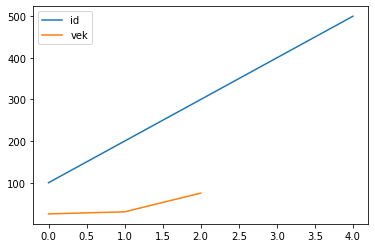

In [101]:
osoby.plot()

In [19]:
osoby.head(2)

id krestni_jmeno prijmeni   vek pohlavi
0  100        Victor     Hugo  25.0       M
1  200          Mary   Shelly  30.0       F

Vidíme, že byly vykresleny všechny (no všechny - oba) sloupce s numerickými údaji. Automaticky byla do grafu umístěna i legenda. Přerušení čáry odpovídající sloupci *vek* je způsobeno přítomností NaN (not a number). Pokud chceme v takovémto grafu vidět všechny body, přidáme do argumentů plot funkce parametr marker="o"

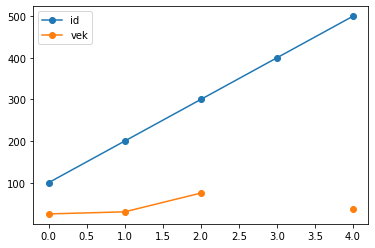

In [103]:
osoby.plot(marker="o")

Pokud chceme vykreslit jiný typ grafu, musí za jménem dataframu následovat plot.typ_grafu. Například scatter graf se vytvoří následujícím příkazem:

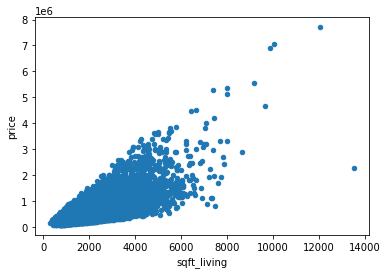

In [104]:
domy.plot.scatter(x="sqft_living", y="price")

Může se stát, že graf bude mít nevyhovující osy x či y. To lze spravit pomocí parametrů xlim resp. ylim.

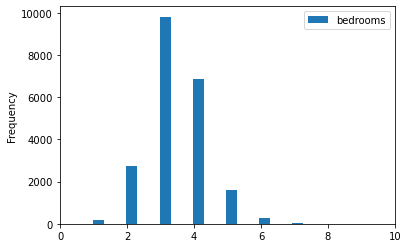

In [105]:
domy[["bedrooms"]].plot.hist(bins=100, xlim=(0,10))

Pro zobrazení více konkrétních sloupců v histogramu napřed provedeme selekci na chtěné sloupce:

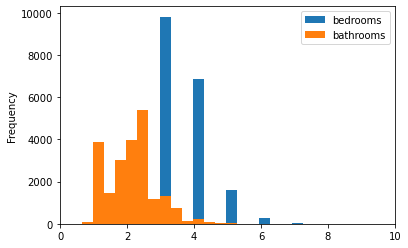

In [106]:
domy[["bedrooms","bathrooms"]].plot.hist(bins=100, xlim=(0,10))

Prakticky totožného výsledku se dá docílit více příkazy. Zde jsou ukázány dva způsoby, jak vytvořit boxplot.

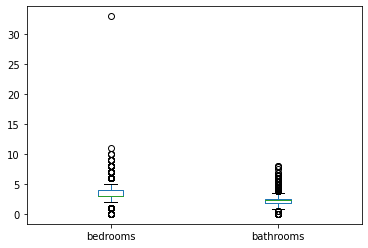

In [107]:
domy[["bedrooms","bathrooms"]].plot.box()

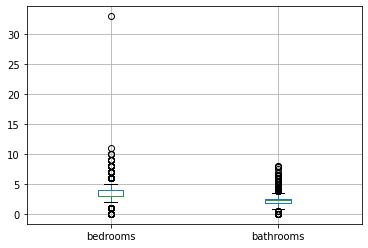

In [108]:
domy[["bedrooms","bathrooms"]].boxplot()

Pakliže chceme vykreslit hodnotu určitého sloupce (zde *price*) pro různé hodnoty sloupce jiného(zde *bathrooms*), použije se následující postup:

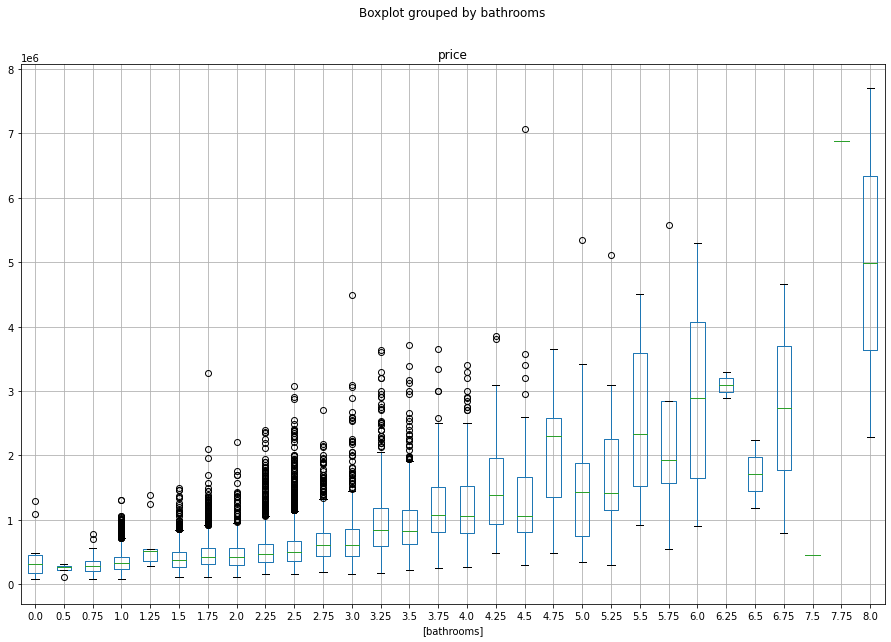

In [109]:
domy.boxplot(column=["price"], by=["bathrooms"], figsize=(15,10))

Pokud chceme graf uložit dejme tomu jako png soubor, musí po řádku vykreslující graf následovat
```python
plt.savefig("nejaky_graf.png")
```
Bacha - oba příkazy musí být ve stejně buňce!

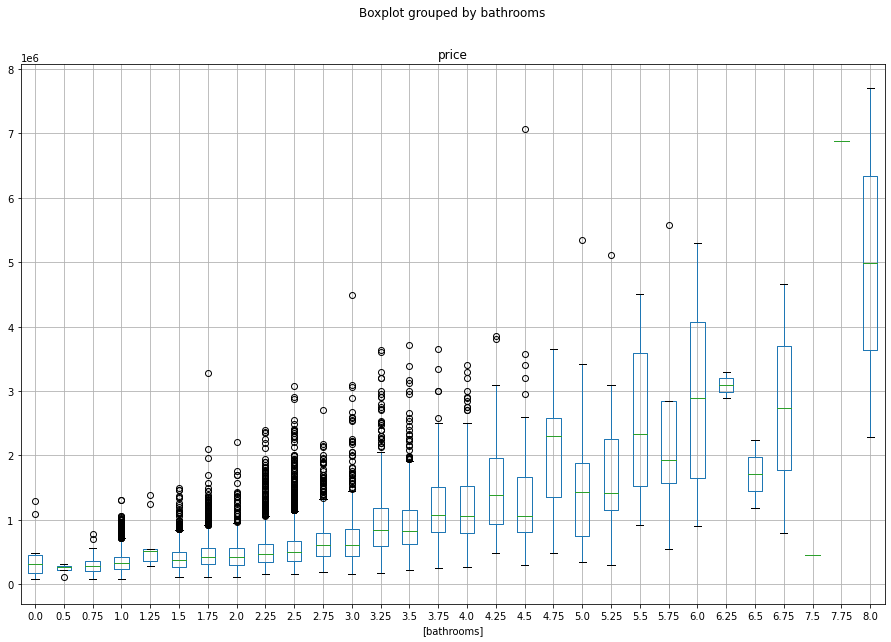

In [110]:
domy.boxplot(column=["price"], by=["bathrooms"], figsize=(15,10))
plt.savefig("nejaky_graf.png")